In [1]:
import numpy as np

from acsbm import models
from examples import run_simulation

Here we consider a miscellaneous smattering of example ACSBM networks. For each network, we:

- Generate the random network.
- Estimate latent community memberships $\hat \theta \approx \theta$ via the proposed spectral algorithm.
- Estimate model coefficients using a GLM with the estimated latent community memberships $\hat \theta$ as a plug-in estimator for $\theta$.

We then show:

- accuracy of latent community estimation (i.e., the proportion of correctly classified nodes)
- the clustering time (broken into Part 1 + Parts 2 and 3) 
- the estimated covariate coefficients
- the time to fit the GLM

And plots of:

- the adjacency matrix of each network (unless it's particularly large)
- the true $\tilde B$ matrix
- the estimated $\tilde B$ matrix
- the estimated $B$ matrix

Note that the estimated $B$ and $\tilde B$ matrices are only expected to be consistent up to a permutation of rows and columns.

# Example 1: Three Binary Covariates with Mixed Homophily Effects

Accuracy: 1.0
Clustering Time: 1.8172179109969875 + 0.17596009800035972 = 1.9931780089973472
Coefficients: [ 0.61164619 -0.51393855  0.10315361]
Estimation Time: 0.022553442991920747


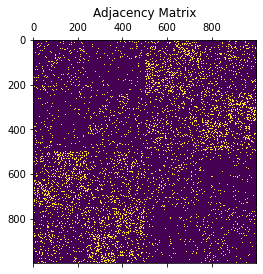

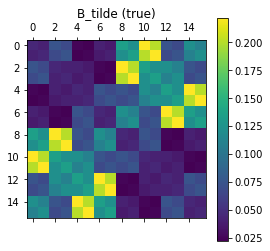

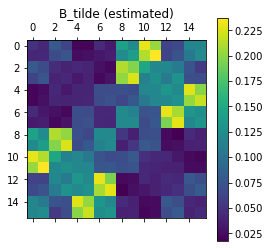

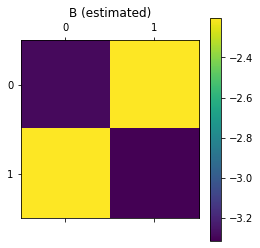

In [2]:
model = models.MultiCovariateModel(
    B=np.log(-0.2 * np.eye(2) + 0.3) - 1,
    covariates=[
        models.Covariate.simple(0.6, 2),
        models.Covariate.simple(-0.5, 2),
        models.Covariate.simple(0.1, 2)
    ],
    link=models.LinkFunction.log()
)
ndd = models.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 1000) # note: works fine with ignore_covariates=True or ignore_communities=True

# Example 2: Similar to the Simpson's Paradox Example

Accuracy: 1.0
Clustering Time: 0.521636324992869 + 0.03262307200930081 = 0.5542593970021699
Coefficients: [-1.01065749]
Estimation Time: 0.008542413008399308


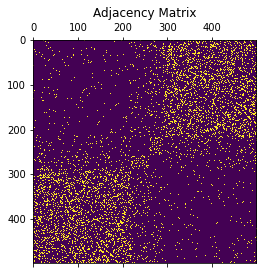

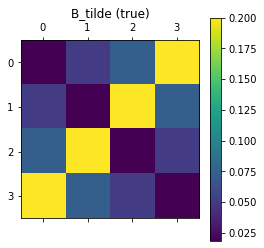

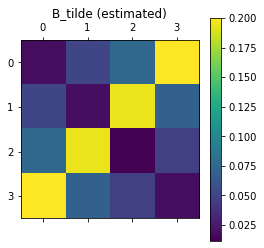

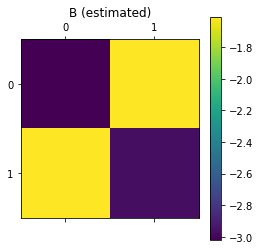

In [3]:
model = models.MultiCovariateModel(
    B=np.log(-.15 * np.eye(2) + 0.2),
    covariates=[models.Covariate.simple(-1, 2)],
    link=models.LinkFunction.log()
)
ndd = models.NodeDataDistribution(np.array([
    [6, 1],
    [1, 6]
]))

run_simulation(model, ndd, 500, ignore_communities=False) # ignore_communities=True results in biased estimate

# Example 3: Covariate Effect Dwarfs Latent Community Structure

Accuracy: 1.0
Clustering Time: 0.37474154400115367 + 0.33359695599938277 = 0.7083385000005364
Coefficients: [1.50645077]
Estimation Time: 0.006828380996012129


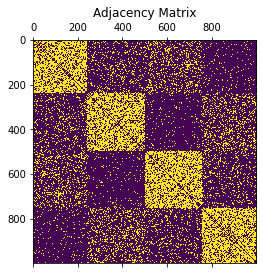

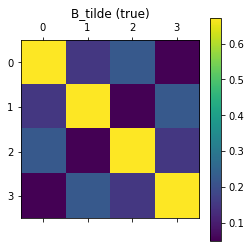

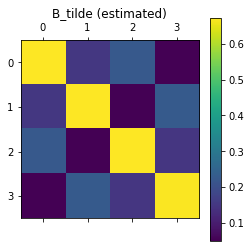

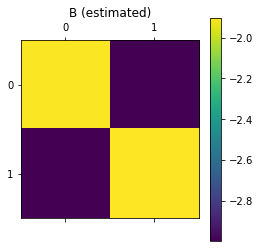

In [4]:
model = models.MultiCovariateModel(B=np.log(.1 * np.eye(2) + 0.05), covariates=[models.Covariate.simple(1.5, 2)], link=models.LinkFunction.log())
ndd = models.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 1000) # ignore_covariates results in terrible accuracy

# Example 4: Random pmf, Two Covariates

Accuracy: 1.0
Clustering Time: 1.9165481599920895 + 0.3701091630064184 = 2.286657322998508
Coefficients: [ 0.49838807 -0.50278776]
Estimation Time: 0.008932335011195391


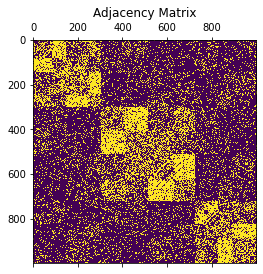

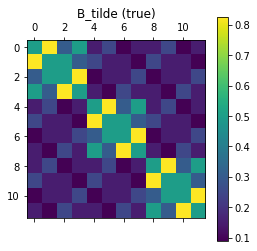

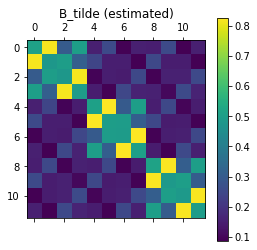

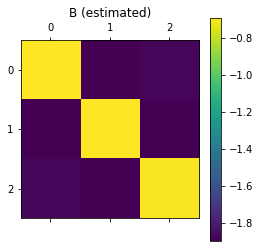

In [5]:
model = models.MultiCovariateModel(
    B=np.log(.35 * np.eye(3) + 0.15),
    covariates=[models.Covariate.simple(0.5, 2), models.Covariate.simple(-0.5, 2)],
    link=models.LinkFunction.log()
)
ndd = models.NodeDataDistribution.random_for_model(model)

run_simulation(model, ndd, 1000)

# Example 5: Logit

Accuracy: 0.999
Clustering Time: 1.4861429130105535 + 0.14015806499810424 = 1.6263009780086577
Coefficients: [ 1.98301551 -1.01989702  0.52223689]
Estimation Time: 0.01634575700154528


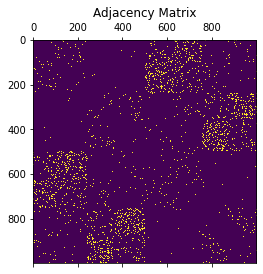

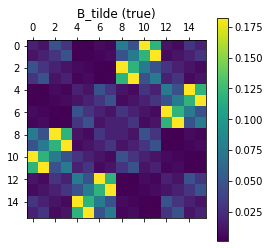

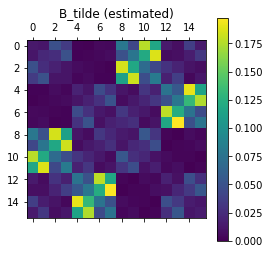

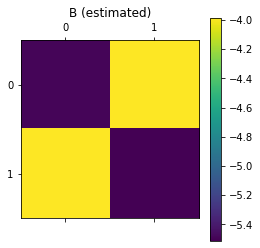

In [6]:
model = models.MultiCovariateModel(
    B=-1.5 * np.eye(2) - 4,
    covariates=[models.Covariate.simple(2, 2), models.Covariate.simple(-1, 2), models.Covariate.simple(0.5, 2)],
    link=models.LinkFunction.logit()
)
ndd = models.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 1000) # ignore_covariates = True breaks accuracy

# Example 6: Irregular Underlying SBM

Accuracy: 1.0
Clustering Time: 0.8572778730012942 + 0.15389385299931746 = 1.0111717260006117
Coefficients: [ 0.51868477 -0.49524819]
Estimation Time: 0.0068954470043536276


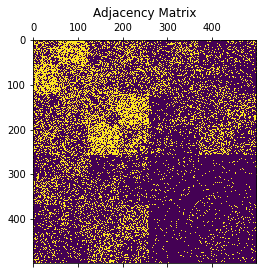

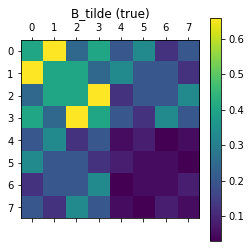

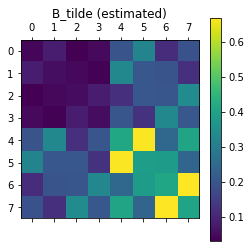

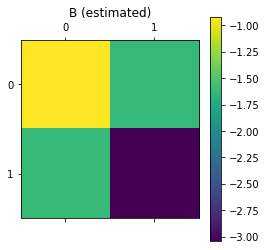

In [7]:
model = models.MultiCovariateModel(
    B=np.log(np.array([
        [0.4, 0.2],
        [0.2, 0.05]
    ])),
    covariates=[models.Covariate.simple(0.5, 2), models.Covariate.simple(-0.5, 2)],
    link=models.LinkFunction.log()
)
ndd = models.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 500) # ignore_covariates=True hurts accuracy

# Example 7: Probit Link

Accuracy: 1.0
Clustering Time: 2.5071457459998783 + 0.24120558600407094 = 2.748351332003949
Coefficients: [ 0.90262118 -0.69715466  0.10441208]
Estimation Time: 0.04358290298841894


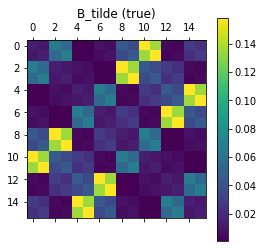

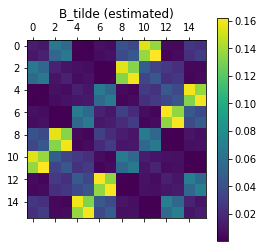

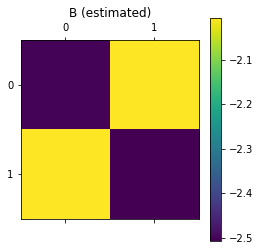

In [8]:
model = models.MultiCovariateModel(
    B=-0.5 * np.eye(2) - 2,
    covariates=[
        models.Covariate.simple(0.9, 2),
        models.Covariate.simple(-0.7, 2),
        models.Covariate.simple(0.1, 2)
    ],
    link=models.LinkFunction.probit()
)
ndd = models.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 2000) # ignore_covariates=True hurts accuracy

# Example 8: Identity Link

Accuracy: 0.999
Clustering Time: 3.286771068989765 + 0.36828851999598555 = 3.6550595889857505
Coefficients: [ 0.20254638 -0.19854766  0.00915278]
Estimation Time: 0.015254212004947476


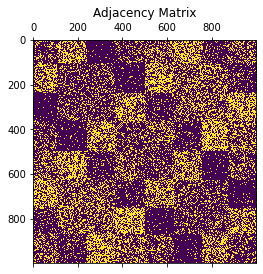

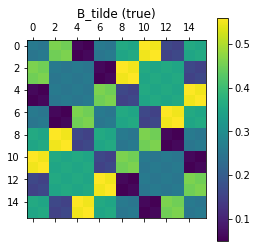

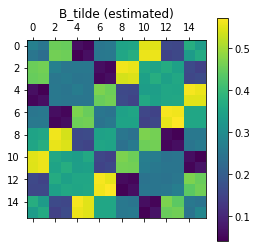

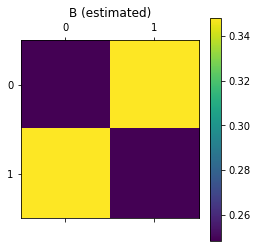

In [9]:
model = models.MultiCovariateModel(
    B=-0.1 * np.eye(2) + 0.35,
    covariates=[
        models.Covariate.simple(0.2, 2),
        models.Covariate.simple(-0.2, 2),
        models.Covariate.simple(0.01, 2)
    ],
    link=models.LinkFunction.identity()
)
ndd = models.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 1000) # ignore_covariates=True hurts accuracy

# Example 9: Not Full Rank

Accuracy: 0.999
Clustering Time: 1.6967743069981225 + 0.23168023499601986 = 1.9284545419941423
Coefficients: [-0.29032469]
Estimation Time: 0.010938956998870708


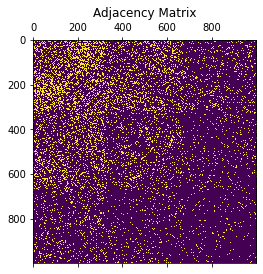

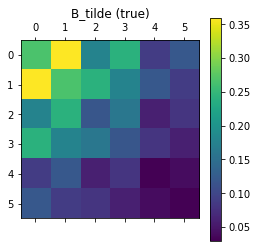

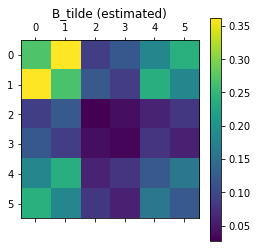

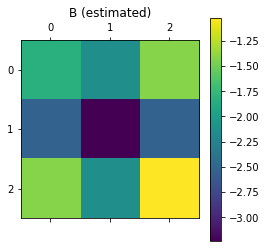

In [10]:
model = models.MultiCovariateModel(
    B=np.log(np.outer([.6, .4, .2], [.6, .4, .2])),
    covariates=[models.Covariate.simple(-0.3, 2)],
    link=models.LinkFunction.log()
)
ndd = models.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 1000)